# Artificial Intelligence in Finance

## Superintelligence

In [3]:
import gym
import numpy as np
import pandas as pd
np.random.seed(100)

In [4]:
env = gym.make('CartPole-v0')

In [5]:
env.seed(100)

[100]

In [6]:
action_size = env.action_space.n
action_size

2

In [7]:
[env.action_space.sample() for _ in range(10)]

[1, 0, 0, 1, 0, 0, 0, 1, 1, 1]

In [8]:
state_size = env.observation_space.shape[0]
state_size

4

In [9]:
state = env.reset()
state  # [cart position, cart velocity, pole angle, pole angular velocity]

array([-0.01628537,  0.02379786, -0.0391981 , -0.01476447])

In [10]:
state, reward, done, _ = env.step(env.action_space.sample())
state, reward, done, _

(array([-0.01580941, -0.17074066, -0.03949338,  0.26529786]), 1.0, False, {})

In [11]:
%%time
data = pd.DataFrame()
state = env.reset()
length = []
for run in range(25000):
    done = False
    prev_state = env.reset()
    treward = 1
    results = []
    while not done:
        action = env.action_space.sample()
        state, reward, done, _ = env.step(action)
        results.append({'s1': prev_state[0], 's2': prev_state[1],
                        's3': prev_state[2], 's4': prev_state[3],
                        'a': action, 'r': reward})
        treward += reward if not done else 0
        prev_state = state
    if treward >= 110:
        data = data.append(pd.DataFrame(results))
        length.append(treward)

Wall time: 19.7 s


In [12]:
np.array(length).mean()

122.33333333333333

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1101 entries, 0 to 114
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   s1      1101 non-null   float64
 1   s2      1101 non-null   float64
 2   s3      1101 non-null   float64
 3   s4      1101 non-null   float64
 4   a       1101 non-null   int64  
 5   r       1101 non-null   float64
dtypes: float64(5), int64(1)
memory usage: 60.2 KB


In [14]:
data.tail()

,s1,s2,s3,s4,a,r
110,-0.074018,0.296526,0.103990,0.462750,0,1.0
111,-0.068087,0.100100,0.113245,0.786315,0,1.0
112,-0.066085,-0.096380,0.128972,1.112371,0,1.0
113,-0.068013,-0.292938,0.151219,1.442572,0,1.0
114,-0.073871,-0.489563,0.180070,1.778433,1,1.0


In [15]:
from pylab import plt
plt.style.use('seaborn')
%matplotlib inline

In [16]:
import tensorflow as tf
tf.random.set_seed(100)

In [17]:
from keras.layers import Dense
from keras.models import Sequential

In [18]:
model = Sequential()
model.add(Dense(64, activation='relu',
                input_dim=env.observation_space.shape[0]))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['acc'])

In [19]:
%%time
model.fit(data[['s1', 's2', 's3', 's4']], data['a'],
          epochs=25, verbose=False, validation_split=0.2)

Wall time: 5.95 s


In [20]:
res = pd.DataFrame(model.history.history)
res.tail(3)

,loss,acc,val_loss,val_acc
22,0.634419,0.647727,0.652877,0.628959
23,0.633836,0.652273,0.653585,0.624434
24,0.633681,0.653409,0.653944,0.624434


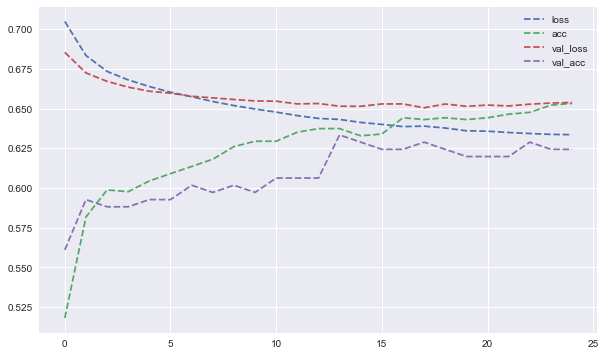

In [21]:
res.plot(figsize=(10, 6), style='--');

In [22]:
def epoch():
    done = False
    state = env.reset()
    treward = 1
    while not done:
        action = np.where(model.predict(np.atleast_2d(state))[0][0] > 0.5, 1, 0)
        state, reward, done, _ = env.step(action)
        treward += reward if not done else 0
    return treward

In [23]:
epoch()

200.0

In [24]:
res = np.array([epoch() for _ in range(100)])
res

array([200., 200., 200., 200., 200., 200., 200., 200., 200., 200., 200.,
       200., 200., 200., 200., 200., 200., 200., 200., 200., 200., 200.,
       200., 200., 200., 200., 200., 200., 200., 200., 200., 200., 200.,
       200., 200., 200., 200., 200., 200., 200., 200., 200., 200., 200.,
       200., 200., 200., 200., 200., 200., 200., 200., 200., 200., 200.,
       200., 200., 200., 200., 200., 200., 200., 200., 200., 200., 200.,
       200., 200., 200., 200., 199., 200., 200., 200., 200., 200., 200.,
       200., 200., 200., 200., 200., 200., 200., 200., 200., 200., 200.,
       200., 200., 200., 200., 200., 200., 200., 200., 200., 200., 200.,
       200.])

In [ ]:
res.mean()